# Description 
The code was developed to assess climate variability in Benue Basin, Nigeria 

In [2]:
# Install jupyter lab + git extension in not installed
#conda install -c conda-forge jupyterlab jupyterlab-git

# Install packages
"""
conda install -c conda-forge geopandas
conda install -c conda-forge matplotlib
conda install -c conda-forge geojson
conda install -c conda-forge folium
"""
# ... install other packages



'\nconda install -c conda-forge geopandas\nconda install -c conda-forge matplotlib\nconda install -c conda-forge geojson\nconda install -c conda-forge folium\n'

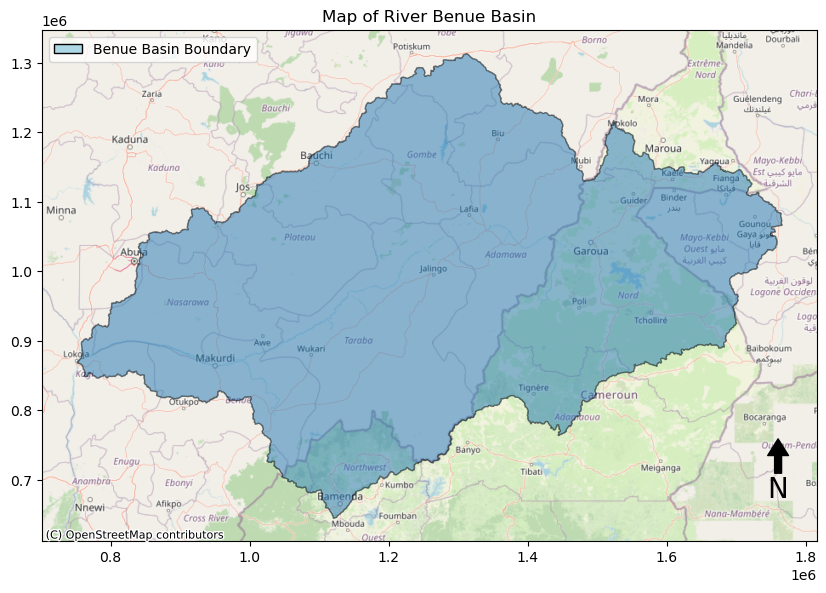

In [8]:
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as ctx
from matplotlib.patches import Patch

# Load the shapefile
aoi = gpd.read_file('BasinBoundaryWGS84/Boundary.shp')

# Project the data to Web Mercator (EPSG:3857)
aoi = aoi.to_crs(epsg=3857)

# Plot the AOI with OpenStreetMap background
fig, ax = plt.subplots(figsize=(10, 10))
aoi.plot(ax=ax, alpha=0.5, edgecolor='k')
ctx.add_basemap(ax, source=ctx.providers.OpenStreetMap.Mapnik)

# Add legend
legend_elements = [Patch(facecolor='lightblue', edgecolor='k', label='Benue Basin Boundary')]
ax.legend(handles=legend_elements, loc='upper left')

# Add north arrow
x, y, arrow_length = 0.95, 0.2, 0.1
ax.annotate('N', xy=(x, y), xytext=(x, y-arrow_length),
            arrowprops=dict(facecolor='black', width=5, headwidth=15),
            ha='center', va='center', fontsize=20, xycoords=ax.transAxes)

plt.title('Map of River Benue Basin')
plt.show()